# Deteccion de anomalias

**KNN (K-vecino más cercano):**

In [211]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.neighbors import NearestNeighbors

In [213]:
# import data
data = pd.read_csv("iris.csv")
data2 = pd.read_csv("iris2.csv")
# input data
df = data[["sepal.length", "sepal.width"]]


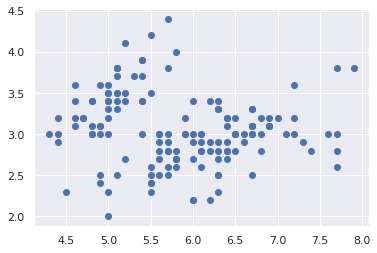

In [195]:
# scatterplot of inputs data
plt.scatter(df["sepal.length"], df["sepal.width"])

In [196]:
# create arrays
X = df.values

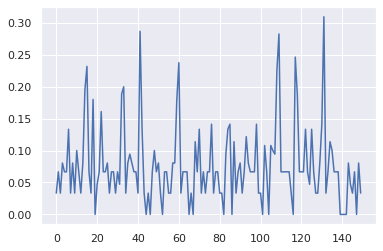

In [197]:
# instantiate model
nbrs = NearestNeighbors(n_neighbors = 3)
# fit model
nbrs.fit(X)
# distances and indexes of k-neaighbors from model outputs
distances, indexes = nbrs.kneighbors(X)
# plot mean of k-distances of each observation
plt.plot(distances.mean(axis =1))

In [198]:
#visually determine cutoff values > 0.15
outlier_index = np.where(distances.mean(axis = 1) > 0.15)
outlier_index

(array([ 14,  15,  18,  22,  32,  33,  41,  59,  60, 108, 109, 117, 118,
        131]),)

In [219]:
#filter outlier values 
outlier_values = df.iloc[outlier_index] 
outlier_values

,sepal.length,sepal.width
14,5.8,4.0
15,5.7,4.4
18,5.7,3.8
22,4.6,3.6
32,5.2,4.1
33,5.5,4.2
41,4.5,2.3
59,5.2,2.7
60,5.0,2.0
108,6.7,2.5


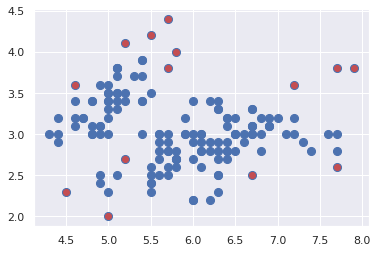

In [220]:
# plot data
plt.scatter(df["sepal.length"], df["sepal.width"], color = "b", s = 65)
# plot outlier values
plt.scatter(outlier_values["sepal.length"], outlier_values["sepal.width"], color = "r")